In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import History
from keras.optimizers import SGD, RMSprop


Read the time series and normalize it

In [ ]:
Sunspot=pd.read_excel("Sunspot_series.xls", header=None)[1].values[0:-1]
Sc=MinMaxScaler(feature_range=(-.8, .8))
Sunspot_normed=Sc.fit_transform(Sunspot)#.reshape(-1, 1)
Data=Sunspot_normed.copy() # normalized data

L=len(Sunspot)
Window=8
n_training=221-Window+1

Sliding window over the time series, train/test split

In [5]:
Data_W=np.zeros((L-Window+1,Window))#[]

for i in range(L-Window+1):
    Data_W[i,:]=Data[i:i+Window]

X_train=Data_W[:n_training,:Window-1]
y_train=Data_W[:n_training, Window-1]

X_test=Data_W[n_training:,:Window-1]
y_test=Data_W[n_training:, Window-1]

Construct the ANN and train the network

In [ ]:
model=Sequential()
hid=8
model.add(Dense(input_dim=Window-1, output_dim=hid, activation='tanh'))
model.add(Dropout(.2))
model.add(Dense(input_dim=hid, output_dim=hid, activation='tanh'))
model.add(Dropout(.2))
model.add(Dense(input_dim=hid, output_dim=1, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='sgd')
###--------------------
hist=model.fit(X_train, y_train,  nb_epoch=2000, validation_split=0.2)

Train on 171 samples, validate on 43 samples
Epoch 1/2000
171/171 [==============================] - 0s - loss: 0.2399 - val_loss: 0.0987
Epoch 2/2000
171/171 [==============================] - 0s - loss: 0.1923 - val_loss: 0.0761
Epoch 3/2000
171/171 [==============================] - 0s - loss: 0.1712 - val_loss: 0.0625
Epoch 4/2000
171/171 [==============================] - 0s - loss: 0.1452 - val_loss: 0.0554
Epoch 5/2000
171/171 [==============================] - 0s - loss: 0.1396 - val_loss: 0.0500
Epoch 6/2000
171/171 [==============================] - 0s - loss: 0.1209 - val_loss: 0.0470
Epoch 7/2000
171/171 [==============================] - 0s - loss: 0.1143 - val_loss: 0.0450
Epoch 8/2000
171/171 [==============================] - 0s - loss: 0.1177 - val_loss: 0.0425
Epoch 9/2000
171/171 [==============================] - 0s - loss: 0.1292 - val_loss: 0.0405
Epoch 10/2000
171/171 [==============================] - 0s - loss: 0.1093 - val_loss: 0.0392
Epoch 11/2000
171/171 [=

Plot the training and validation errors

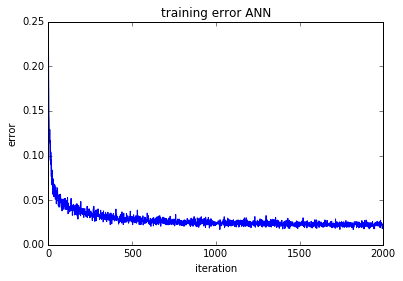

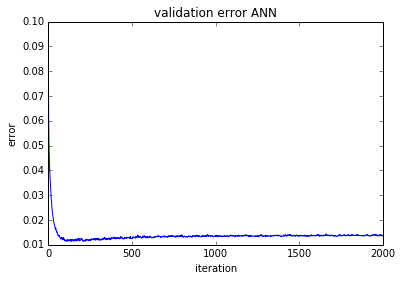

In [9]:
plt.figure(1)
plt.plot(hist.history['loss'])
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error ANN')

###
plt.figure(2)
plt.plot(hist.history['val_loss'])
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('validation error ANN')
plt.show()

Use the trained network for the prediction

In [10]:
predict_normal= model.predict(Data_W[:,:Window-1])
predict=Sc.inverse_transform(predict_normal)

Plot the actual time series and the prediction

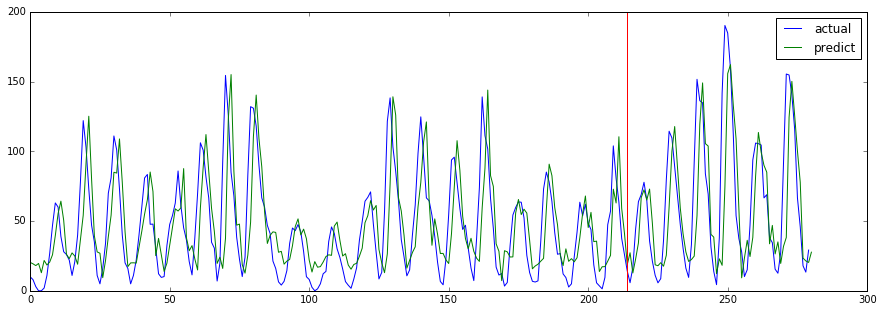

In [11]:
plt.figure(figsize=(15,5))
plt.plot(Sunspot[Window:],label='actual')
plt.hold('on')
plt.plot(predict,label='predict')
plt.legend()
plt.axvline(x=n_training,color='r') 

Error definition

In [12]:
def MSE(orig,predict):
    #error=np.sum((orig-predict)**2)/len(orig)
    #error= np.mean(np.transpose(orig)-np.transpose(predict))**2
    error=np.mean((orig-predict)**2)
    return error
def MAE(orig,predict):
    error=np.mean(np.abs(orig-predict))
    return error 
def R(orig,predict):## correlation cofficient
    morig=np.mean(orig)
    mpredict=np.mean(predict)
    T = len(orig)
    xm, ym = orig-morig, predict-mpredict
    r_num=np.sum(xm*ym)
    r_den = np.sqrt(np.sum(xm**2))*np.sqrt(np.sum(ym**2))
    r = r_num / r_den
    return r

Prediction error of the test set

In [13]:
Test_orig=Sunspot[n_training+Window-1:]
Test_predict=predict[n_training:]

TEST_MAE=MAE(Test_orig,Test_predict)
TEST_MSE=MSE(Test_orig,Test_predict)
TEST_R=R(Test_orig,Test_predict)

print('TEST_MAE=',TEST_MAE,'TEST_MSE=',TEST_MSE,'TEST_R=',TEST_R)

TEST_MAE= 51.1025003899 TEST_MSE= 4250.0671563 TEST_R= -1.04366979398e-16


Construct the RNN and train it

In [15]:
X_train_RNN = X_train[:, :, np.newaxis]

model_RNN=Sequential()
hid=8
model_RNN.add(SimpleRNN(input_dim=1, output_dim=hid, activation='tanh'))#
model_RNN.add(Dropout(.2))
model_RNN.add(Dense(input_dim=hid, output_dim=hid,activation='tanh'))
model_RNN.add(Dropout(.2))
model_RNN.add(Dense(input_dim=hid, output_dim=1,activation='tanh'))#,activation='tanh'
model_RNN.compile(loss='mean_squared_error', optimizer='sgd')
###--------------------
hist_RNN=model_RNN.fit(X_train_RNN, y_train,  nb_epoch=2000, validation_split=0.2)

Train on 171 samples, validate on 43 samples
Epoch 1/2000
171/171 [==============================] - 0s - loss: 0.1503 - val_loss: 0.0341
Epoch 2/2000
171/171 [==============================] - 0s - loss: 0.1459 - val_loss: 0.0342
Epoch 3/2000
171/171 [==============================] - 0s - loss: 0.1509 - val_loss: 0.0350
Epoch 4/2000
171/171 [==============================] - 0s - loss: 0.1271 - val_loss: 0.0365
Epoch 5/2000
171/171 [==============================] - 0s - loss: 0.1312 - val_loss: 0.0404
Epoch 6/2000
171/171 [==============================] - 0s - loss: 0.1299 - val_loss: 0.0388
Epoch 7/2000
171/171 [==============================] - 0s - loss: 0.1204 - val_loss: 0.0378
Epoch 8/2000
171/171 [==============================] - 0s - loss: 0.1019 - val_loss: 0.0347
Epoch 9/2000
171/171 [==============================] - 0s - loss: 0.1038 - val_loss: 0.0337
Epoch 10/2000
171/171 [==============================] - 0s - loss: 0.1093 - val_loss: 0.0321
Epoch 11/2000
171/171 [=

Plot of the training and validation error

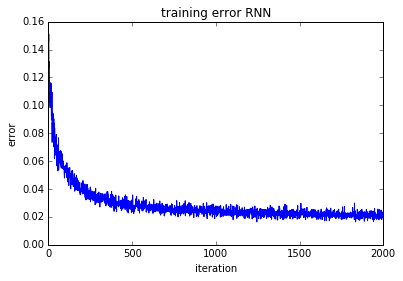

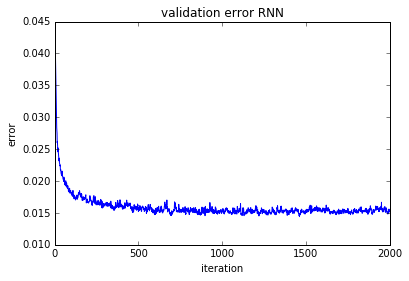

In [16]:
plt.figure(1)
plt.plot(hist_RNN.history['loss'])
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error RNN')

###
plt.figure(2)
plt.plot(hist_RNN.history['val_loss'])
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('validation error RNN')
plt.show()

Predict the time series using the trained network and rescale the result

In [17]:
predict_normal_RNN= model_RNN.predict(Data_W[:,:Window-1,np.newaxis])
predict_RNN=Sc.inverse_transform(predict_normal_RNN)

Plot the actual and the predited time series

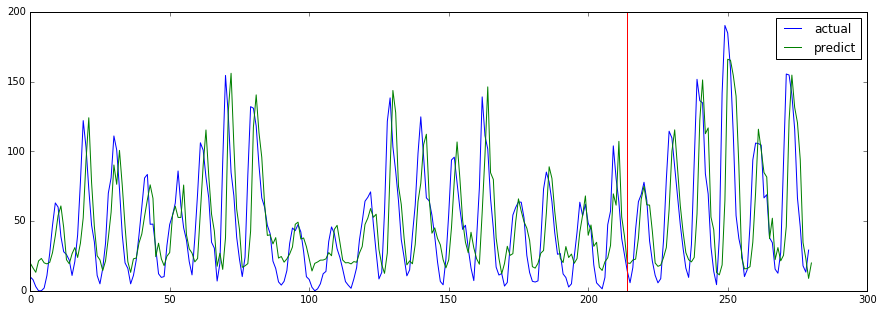

In [18]:
plt.figure(figsize=(15,5))
plt.plot(Sunspot[Window:],label='actual')
plt.hold('on')
plt.plot(predict_RNN,label='predict')
plt.legend()
plt.axvline(x=n_training,color='r') 

Error of the prediction over the test set

In [19]:
Test_orig=Sunspot[n_training+Window-1:]
Test_predict_RNN=predict_RNN[n_training:]

TEST_MAE_RNN=MAE(Test_orig,Test_predict_RNN)
TEST_MSE_RNN=MSE(Test_orig,Test_predict_RNN)
TEST_R_RNN=R(Test_orig,Test_predict_RNN)

print('TEST_MAE_RNN=',TEST_MAE_RNN,'TEST_MSE_RNN=',TEST_MSE_RNN,'TEST_R_RNN=',TEST_R_RNN)

TEST_MAE_RNN= 52.6682451783 TEST_MSE_RNN= 4514.54731452 TEST_R_RNN= -1.69642251025e-16


Time series prediction using Gradient Boosting Regression (ensemble decision tree)

In [ ]:
modelG = GradientBoostingRegressor(max_depth=4, n_estimators=500 ,learning_rate= 0.01, loss= 'ls', max_features=Window-1)
modelG.fit(X_train,y_train)
predict_normal_G=modelG.predict(Data_W[:,:Window-1])

predict_G=Sc.inverse_transform(predict_normal_G)

Prediction results

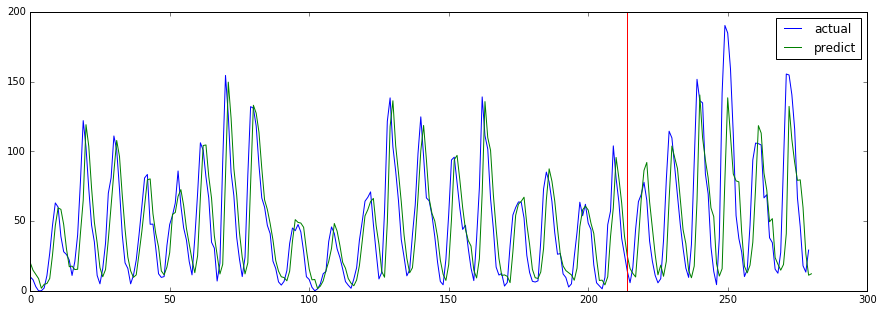

In [21]:
plt.figure(figsize=(15,5))
plt.plot(Sunspot[Window:],label='actual')
plt.hold('on')
plt.plot(predict_G,label='predict')
plt.legend()
plt.axvline(x=n_training,color='r') 

Error of prediction of test set

In [22]:
Test_predict_G=predict_G[n_training:]

TEST_MAE_G=MAE(Test_orig,Test_predict_G)
TEST_MSE_G=MSE(Test_orig,Test_predict_G)
TEST_R_G=R(Test_orig,Test_predict_G)

print('TEST_MAE_G=',TEST_MAE_G,'TEST_MSE_G=',TEST_MSE_G,'TEST_R_G=',TEST_R_G)

TEST_MAE_G= 16.1505377637 TEST_MSE_G= 561.119672026 TEST_R_G= 0.913630757323
